<a href="https://colab.research.google.com/github/sp-moribito/pythonbasic/blob/main/py210617.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


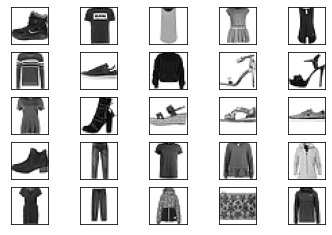

In [3]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show() 

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5342 - accuracy: 0.8112
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4035 - accuracy: 0.8547
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3656 - accuracy: 0.8666
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3457 - accuracy: 0.8747
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3303 - accuracy: 0.8786
313/313 - 0s - loss: 0.3551 - accuracy: 0.8700


[0.3551088273525238, 0.8700000047683716]

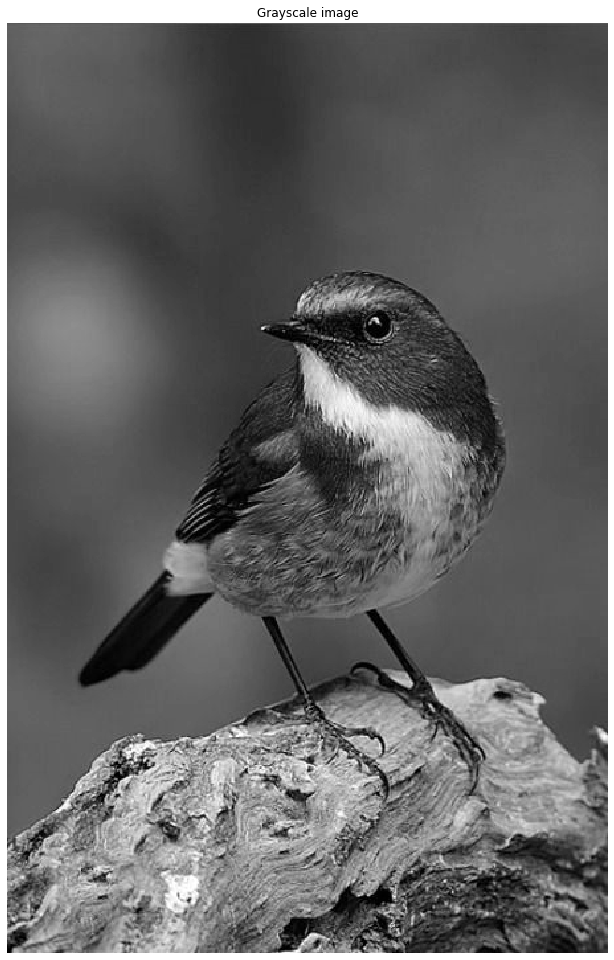

In [9]:
from skimage.io import imread, imshow

image_gs = imread('bird.jpg', as_gray=True)
fig, ax = plt.subplots(figsize=(9,16))
imshow(image_gs, ax=ax)
ax.set_title('Grayscale image')
ax.axis('off');

In [7]:
!pip install scikit_image

In [11]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
import matplotlib.pyplot as plt

def print_image_summary(image, labels):

    print('--------------')
    print('Image Details:')
    print('--------------')
    print(f'Image dimensions: {image.shape}')
    print('Channels:')

    if len(labels) == 1:
        image = image[..., np.newaxis]

    for i, lab in enumerate(labels):
        min_val = np.min(image[:,:,i])
        max_val = np.max(image[:,:,i])
        print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}')

print_image_summary(image_gs, ['G'])

--------------
Image Details:
--------------
Image dimensions: (703, 454)
Channels:
G : min=0.0000, max=1.0000


In [12]:
X_train_final = x_train.reshape((-1,28,28,1)) / 255.
X_test_final = x_test.reshape((-1,28,28,1)) / 255.

In [13]:
model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',
                           input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_with_conv.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

In [15]:
model_with_conv.fit(X_train_final, y_train, epochs=5)
model_with_conv.evaluate(X_test_final, y_test, verbose=5)

Epoch 1/5
1875/1875 [==============================] - 74s 39ms/step - loss: 0.3520 - accuracy: 0.8718
Epoch 2/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.3316 - accuracy: 0.8782
Epoch 3/5
1875/1875 [==============================] - 74s 40ms/step - loss: 0.3133 - accuracy: 0.8863
Epoch 4/5
1875/1875 [==============================] - 74s 40ms/step - loss: 0.2996 - accuracy: 0.8901
Epoch 5/5
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2855 - accuracy: 0.8951


[0.31010645627975464, 0.888700008392334]

In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
model = ResNet50(include_top=True,
                 weights="imagenet",
                 input_tensor=None,
                 input_shape=None,
                 pooling=None,
                 classes=1000)

102973440/102967424 [==============================] - 1s 0us/step


In [18]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [19]:
model.trainable = False
model = Sequential([model,
                    Dense(2, activation='sigmoid')])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1000)              25636712  
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 2002      
Total params: 25,638,714
Trainable params: 2,002
Non-trainable params: 25,636,712
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

epoch, iterations, batch size

데이터가 클 경우 한번에 학습하지 못해 데이터를 나눠서 학습하게 될 때 등장한다. 

사전적의미는
epoch 시대 , iteration 반복, batch 집단.
이지만,,,,,

머신러닝에서는
epoch 은 전체 데이터가 알고리즘에 한번 다 통과하는것을 의미한다. epoch 의 수가 증가할수록 모델의 정확도가 높아진다. 
어느 순간을 지나게 되면 모델이 훈련데이터에 너무 맞춰져서 훈련할 때는 성능이 좋지만 실제 데이터를 적용할 때는 성능이 좋지 않게 되는 overfitting이 발생한다. 마치 같은 문제집을 반복해서 풀면 답을 외워버리는 현상과 비슷하다. 
batch는 하나의 큰 데이터를 작은 데이터 셋으로 나누었을때의 크기를 의미한다. 마치 문제집에서 소단원들로 문제들이 묶여있는것과
비슷하다.
2000개의 데이터가 있을 때 
batch size를 500로 하면 4번이 iteration 되어야 1epoch 가 훈련된다.


In [ ]:
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = "../catanddog/train"
valid_dir = "../catanddog/validation"

train = ImageDataGenerator(
                 rescale=1./255,
                 rotation_range=10,
                 width_shift_range=0.1,
                 height_shift_range=0.1,
                 shear_range=0.1,
                 zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                            target_size=(image_height, image_width),
                                            color_mode="rgb",
                                            batch_size=BATCH_SIZE,
                                            seed=1,
                                            shuffle=True,
                                            class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                            target_size=(image_height, image_width),
                                            color_mode="rgb",
                                            batch_size=BATCH_SIZE,
                                            seed=7,
                                            shuffle=True,
                                            class_mode="categorical")

history = model.fit(train_generator,
                    epochs=10,
                    validation_data=valid_generator,
                    verbose=2)

In [22]:
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib import font_manager

font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()

plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')

FileNotFoundError: ignored

In [ ]:
class_names = ['cat', 'dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict_classes(validation)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i+1, xticks=[], yticks=[])
    ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)